In [1]:
# Basic implementation of the lifting line theory

import numpy as np
from myFunctions import *
import matplotlib.pyplot as plt

plt.style.use('./custom_latex_style.mplstyle')

import seaborn as sns
sns.set_theme()

## Problem 1

C:\Users\audun\AppData\Local\Temp\ipykernel_22956\3412712200.py:7: RuntimeWarning: invalid value encountered in true_divide
  v = gamma/(4*np.pi)*(np.cross(L, r))/((np.linalg.norm(np.cross(L, r)))**2)*(np.dot(L, e_1 - e_2))


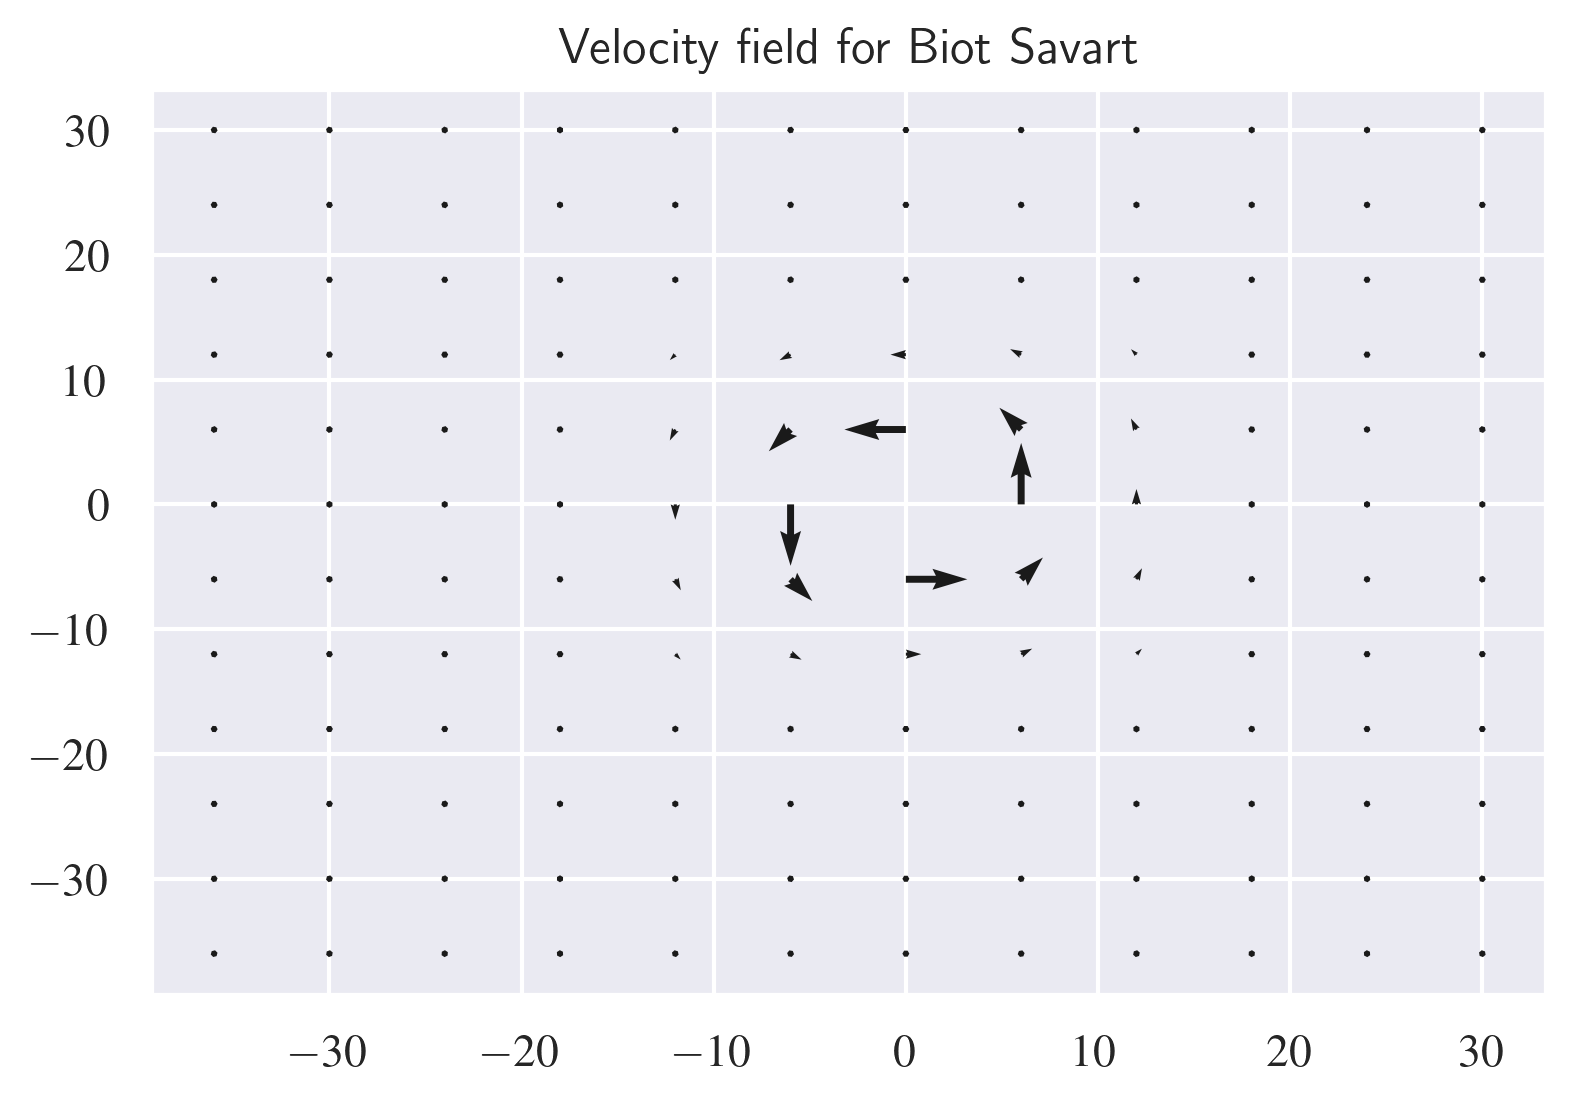

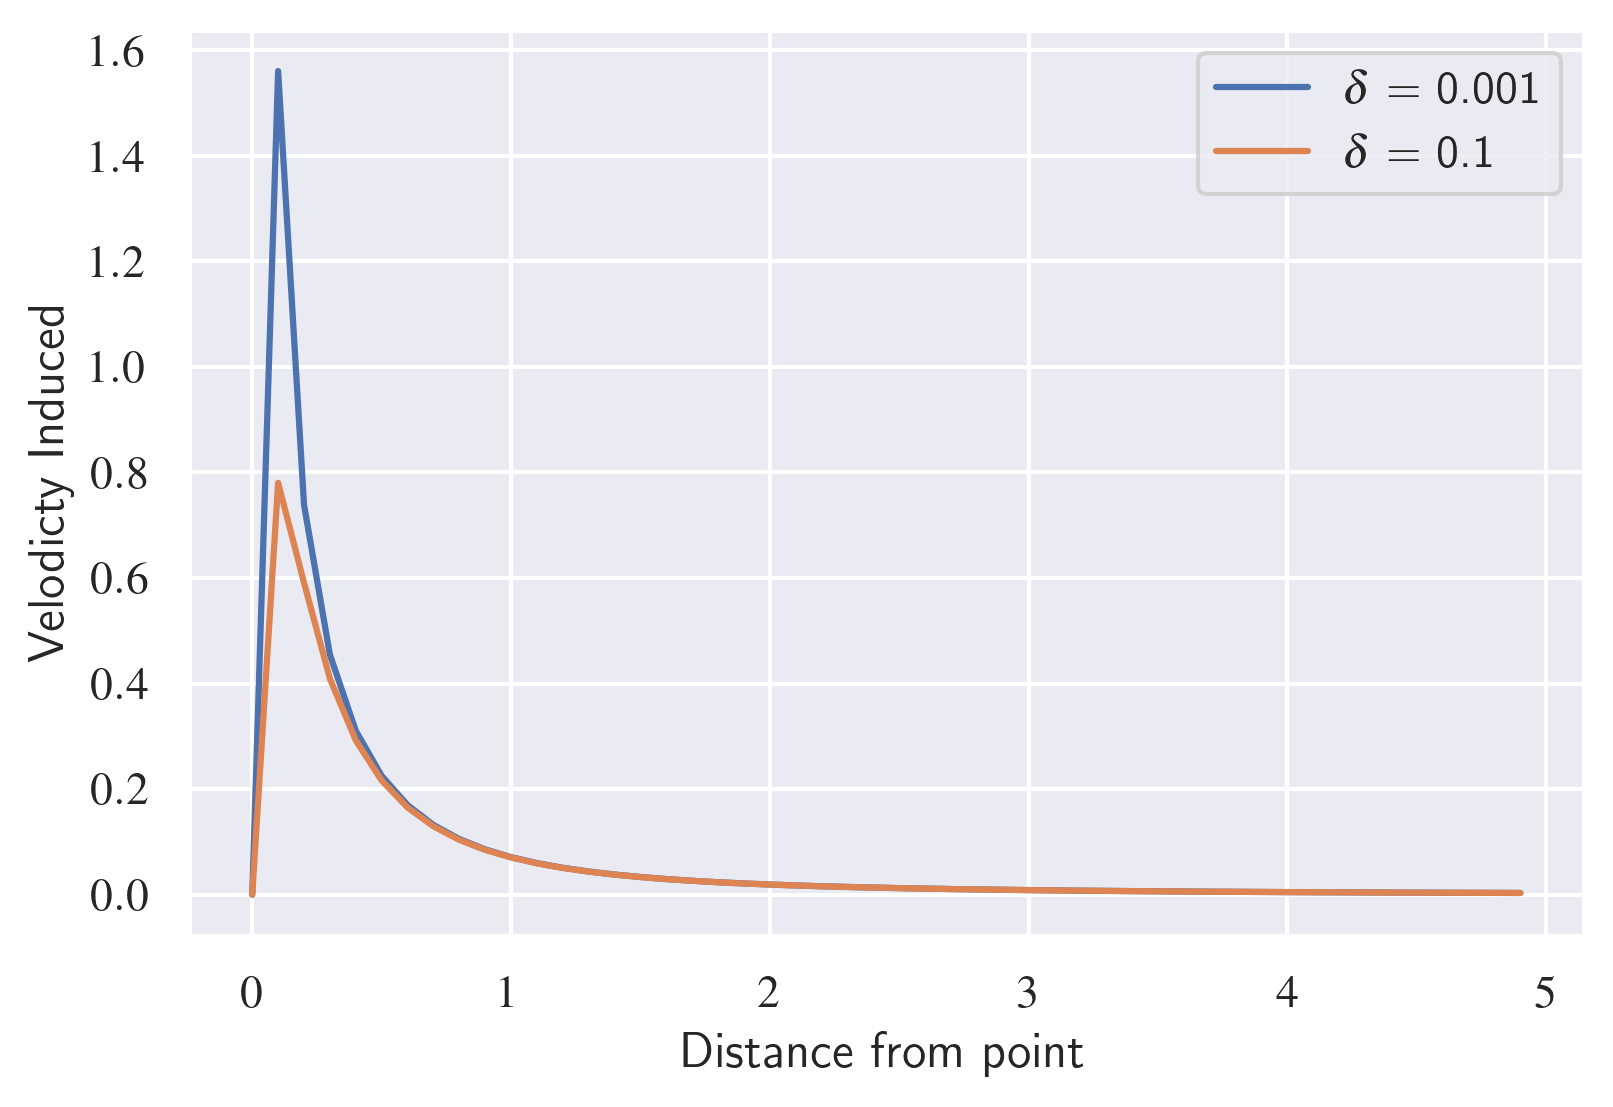

In [2]:
def biot_savart (r):
    gamma = 1
    L = np.array([0,0,1])
    r_2 = r-L 
    e_1 = r/np.linalg.norm(r)
    e_2 = r_2/np.linalg.norm(r_2)
    v = gamma/(4*np.pi)*(np.cross(L, r))/((np.linalg.norm(np.cross(L, r)))**2)*(np.dot(L, e_1 - e_2))
    return v

xmas = []
ymax = []
vector_x = []
vector_y = []

for x in range(-36, 36, 6):
    for y in range(-36, 36, 6):
        r = np.array((x, y, 0.5))
        biot = biot_savart(r)
        vector_y.append(biot[1])
        vector_x.append(biot[0])
        xmas.append(x)
        ymax.append(y)
#This shows a vortex elemnt in the middle. When we go there the velocity increases to infinity.

plt.figure()
plt.quiver(xmas, ymax, vector_x, vector_y, scale=0.05)
plt.title('Velocity field for Biot Savart')
plt.savefig('figure/Velocity_field_BS.pdf', bbox_inches = 'tight')
plt.show()



def biot_savart_mod (r, delta):
    gamma = 1
    L_norm = 1
    L = np.array([0,0,1])
    r_2 = r-L 
    # delta = 0.001
    e_1 = r/np.linalg.norm(r)
    e_2 = r_2/np.linalg.norm(r_2)
    v_mod = gamma/(4*np.pi)*(np.cross(L, r))/((np.linalg.norm(np.cross(L, r)))**2 + (delta*L_norm)**2)*(np.dot(L, e_1 - e_2))
    return v_mod

xmas_mod = []
velocity_1 = []
velocity_2 = []

for x in np.arange(0,5,0.1):
    r = np.array([x, 0, 0.5])
    delta_1 = 0.001
    delta_2 = 0.1
    biot_mod_1 = biot_savart_mod(r, delta_1)
    biot_mod_2 = biot_savart_mod(r, delta_2)
    xmas_mod.append(x)
    velocity_1.append(np.linalg.norm(biot_mod_1))
    velocity_2.append(np.linalg.norm(biot_mod_2))



plt.figure()
plt.plot(xmas_mod, velocity_1, label= f'$\delta$ = 0.001')
plt.plot(xmas_mod, velocity_2, label= f'$\delta$ = 0.1')
plt.xlabel('Distance from point')
plt.ylabel('Velodicty Induced')
plt.legend()
plt.savefig('figure/velocity_distance.pdf')
plt.show()

## Problem 2

In [3]:
# # INPUT DATA

# DATA = {
#     "VInf": 10.0,         # Free-stream velocity
#     "Chord": 1.0,         # Chord wing dimension
#     "Rho": 1.225,         # Air density
#     "NHShoe": [35],       # Number of horseshoe elements
#     "AE": [2],            # Aspect ratio
#     "AoA": np.arange(-12, 13, 1)  # Angle of attack in degrees
# }

# FLAG_PLOT = 1           # (1: PLOT Wing / 2: Plot Force curves)
# FLAG_Analysis = 2       # Analysis flag

# # Lengths
# N1 = len(DATA["AoA"])
# N2 = len(DATA["AE"])
# N3 = len(DATA["NHShoe"])

In [4]:
# # Analysis
# if FLAG_Analysis == 1:
#     WING = Geometry(DATA, 0, 0)
#     AMatrix = AerodynamicMatrix(DATA, WING)
#     RHS = RightHandSide(DATA, WING, 0)
#     GAMMA = np.linalg.solve(AMatrix, RHS)
#     LOADS = AerodynamicLoads(WING, DATA, GAMMA)

# elif FLAG_Analysis == 2:
#     AEROLOADS = [None] * N1
#     for i in range(N1):
#         WING = Geometry(DATA, 0, 0)
#         AMatrix = AerodynamicMatrix(DATA, WING)
#         RHS = RightHandSide(DATA, WING, i)
#         GAMMA = np.linalg.solve(AMatrix, RHS)
#         LOADS = AerodynamicLoads(WING, DATA, GAMMA)
#         AEROLOADS[i] = {"LOADS": LOADS}

# elif FLAG_Analysis == 3:
#     AEROLOADS = [None] * N2
#     for i in range(N2):
#         WING = Geometry(DATA, i, 0)
#         AMatrix = AerodynamicMatrix(DATA, WING)
#         RHS = RightHandSide(DATA, WING, 0)
#         GAMMA = np.linalg.solve(AMatrix, RHS)
#         LOADS = AerodynamicLoads(WING, DATA, GAMMA)
#         AEROLOADS[i] = {"LOADS": LOADS}

# elif FLAG_Analysis == 4:
#     AEROLOADS = [None] * N3
#     for i in range(N3):
#         WING = Geometry(DATA, 0, i)
#         AMatrix = AerodynamicMatrix(DATA, WING)
#         RHS = RightHandSide(DATA, WING, 0)
#         GAMMA = np.linalg.solve(AMatrix, RHS)
#         LOADS = AerodynamicLoads(WING, DATA, GAMMA)
#         AEROLOADS[i] = {"LOADS": LOADS}

# Result prints
# PrintScreenReport(DATA)

In [5]:
# # Assuming AEROLOADS is a list of dictionaries with a similar structure to MATLAB's struct array
# L = [aeroload['LOADS']['LSum'] for aeroload in AEROLOADS]
# D = [aeroload['LOADS']['DSum'] for aeroload in AEROLOADS]
# CL = [aeroload['LOADS']['CL'] for aeroload in AEROLOADS]
# CD = [aeroload['LOADS']['CD'] for aeroload in AEROLOADS]

# # Plotting Lift coefficient vs AoA
# plt.figure(1)
# plt.plot(DATA['AoA'], CL, color='b', linewidth=2)
# plt.xlabel('Angle of Attack')
# plt.ylabel('Lift coefficient C_L')
# plt.title('Lift coefficient vs AoA')
# plt.savefig('figure/lift_coeff_vs_AoA.pdf')


# # Plotting Induced Drag coefficient vs AoA
# plt.figure(2)
# plt.plot(DATA['AoA'], CD, color='b', linewidth=2)
# plt.xlabel('Angle of Attack')
# plt.ylabel('Induced Drag coefficient C_D')
# plt.title('Induced drag coefficient vs AoA')
# plt.savefig('figure/induced_drag_coeff_vs_AoA.pdf')


# plt.show()


## Question 2

In [6]:
DATA = {
    "VInf": 10.0,         # Free-stream velocity
    "Chord": 1.0,         # Chord wing dimension
    "Rho": 1.225,         # Air density
    "NHShoe": np.arange(1, 100, 2),       # Number of horseshoe elements
    "AE": [1],            # Aspect ratio
    "AoA": [4]  # Angle of attack in degrees
}

FLAG_PLOT = 1           # (1: PLOT Wing / 2: Plot Force curves)
FLAG_Analysis = 4       # Analysis flag

# Lengths
N1 = len(DATA["AoA"])
N2 = len(DATA["AE"])
N3 = len(DATA["NHShoe"])

In [7]:
# Analysis
if FLAG_Analysis == 1:
    WING = Geometry(DATA, 0, 0)
    AMatrix = AerodynamicMatrix(DATA, WING)
    RHS = RightHandSide(DATA, WING, 0)
    GAMMA = np.linalg.solve(AMatrix, RHS)
    LOADS = AerodynamicLoads(WING, DATA, GAMMA)

elif FLAG_Analysis == 2:
    AEROLOADS = [None] * N1
    for i in range(N1):
        WING = Geometry(DATA, 0, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, i)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 3:
    AEROLOADS = [None] * N2
    for i in range(N2):
        WING = Geometry(DATA, i, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 4:
    AEROLOADS = [None] * N3
    for i in range(N3):
        WING = Geometry(DATA, 0, i)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

# # Result prints
PrintScreenReport(DATA)



******************************************************************************
                                   REPORT
******************************************************************************
Basic implementation of the lifting line theory


Free-stream velocity: 10.000000
Chord wing: 1.000000
Air density: 1.225000
Number of AoAs investigated:    1
Number of AEs (Aspect-Ratio) investigated:    1
Number of different discretizations investigated:   50
-----------------------------------------------------------------------------
                            Aerodynamic Results
-----------------------------------------------------------------------------
Structure variable called AEROLOADS contains the following information:
AEROLOADS(i).LOADS: all results related to the test case "i"
AEROLOADS(i).LOADS.D: Induced drag per horseshoe
AEROLOADS(i).LOADS.L: Lift per horseshoe
AEROLOADS(i).LOADS.DSum: Total induced drag
AEROLOADS(i).LOADS.LSum: Total lift
AEROLOADS(i).LOADS.CL: Lift c

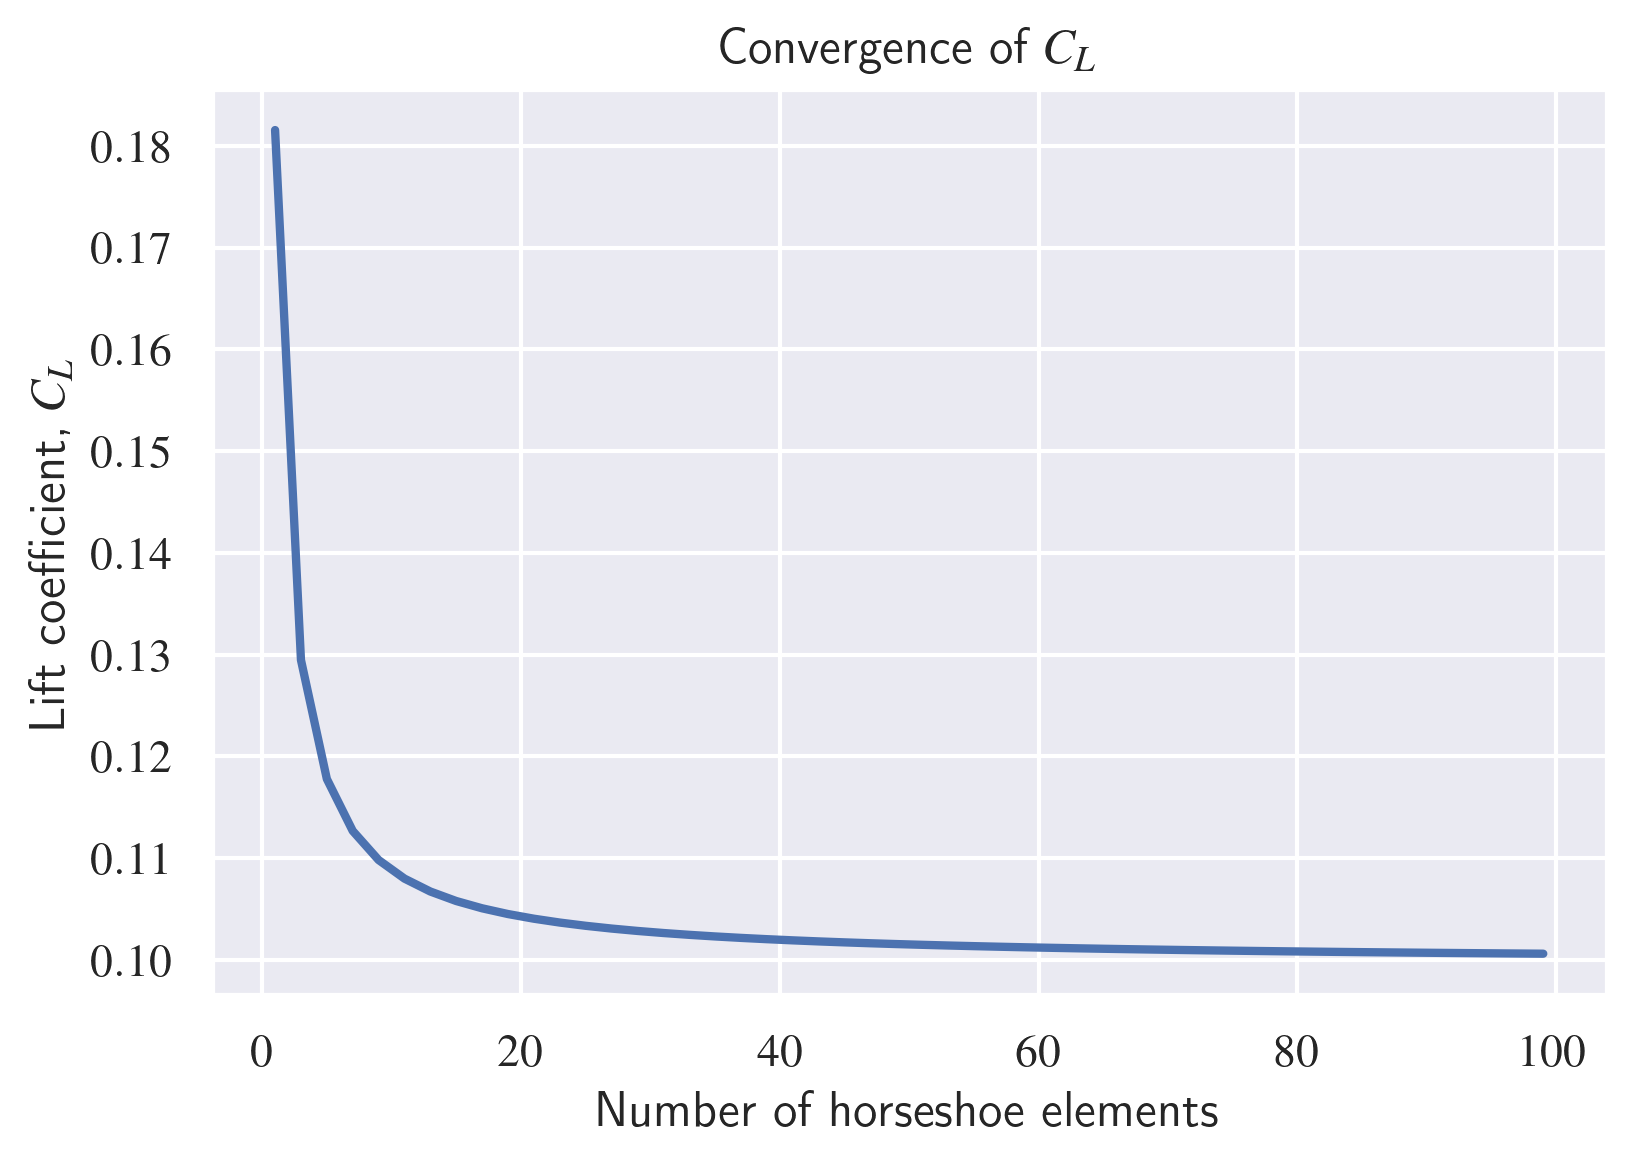

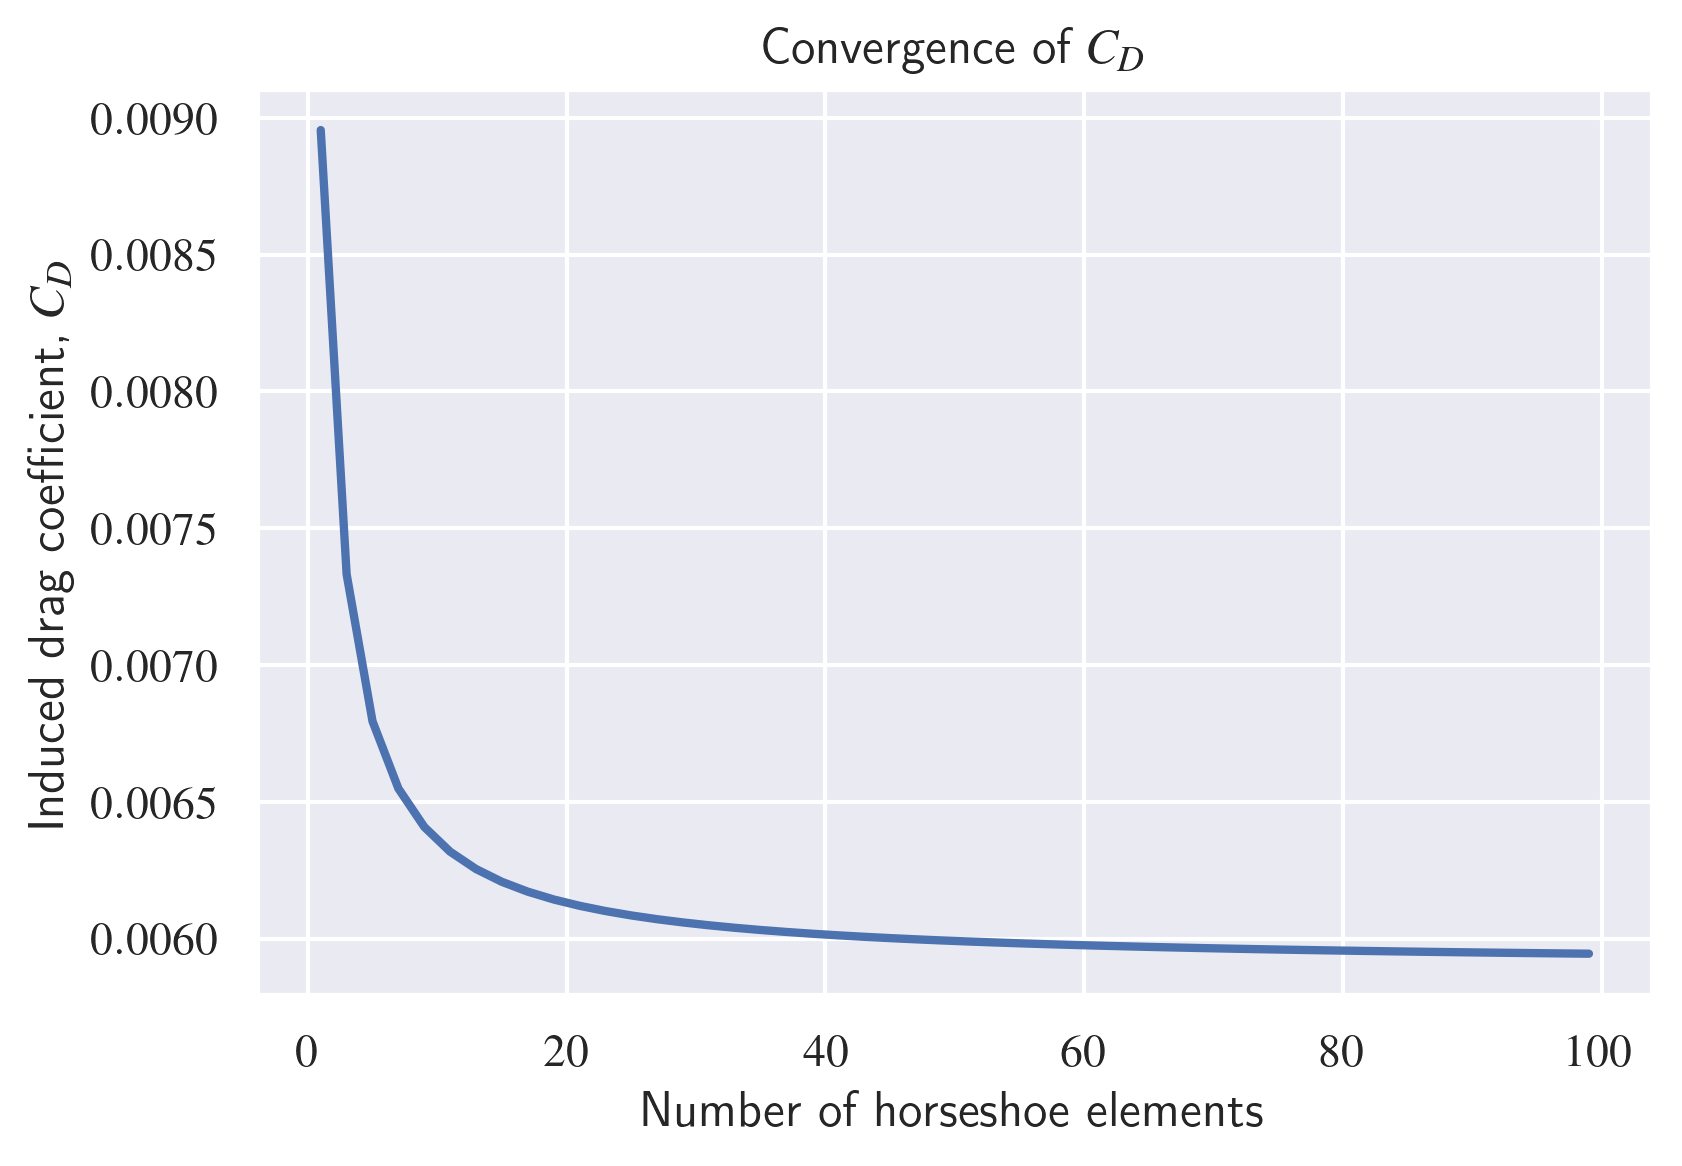

In [8]:
# Assuming AEROLOADS is a list of dictionaries with a similar structure to MATLAB's struct array
L = [aeroload['LOADS']['LSum'] for aeroload in AEROLOADS]
D = [aeroload['LOADS']['DSum'] for aeroload in AEROLOADS]
CL = [aeroload['LOADS']['CL'] for aeroload in AEROLOADS]
CD = [aeroload['LOADS']['CD'] for aeroload in AEROLOADS]

# Plotting Lift coefficient vs AoA
plt.figure(1)
plt.plot(DATA['NHShoe'], CL, color='b', linewidth=2)
plt.xlabel('Number of horseshoe elements')
plt.ylabel('Lift coefficient, $C_L$')
plt.title('Convergence analysis of $C_L$')
plt.savefig('figure/convergence_of_lift.pdf')


# Plotting Induced Drag coefficient vs AoA
plt.figure(2)
plt.plot(DATA['NHShoe'], CD, color='b', linewidth=2)
plt.xlabel('Number of horseshoe elements')
plt.ylabel('Induced drag coefficient, $C_D$')
plt.title('Convergence analysis of $C_D$')
plt.savefig('figure/convergence_of_drag.pdf')

## Question 3

In [9]:
# INPUT DATA

DATA = {
    "VInf": 10.0,         # Free-stream velocity
    "Chord": 1.0,         # Chord wing dimension
    "Rho": 1.225,         # Air density
    "NHShoe": [40],       # Number of horseshoe elements was 20
    "AE": np.arange(1, 101, 1),            # Aspect ratio
    "AoA": [4]  # Angle of attack in degrees
}

FLAG_PLOT = 1           # (1: PLOT Wing / 2: Plot Force curves)
FLAG_Analysis = 3     # Analysis flag

# Lengths
N1 = len(DATA["AoA"])
N2 = len(DATA["AE"])
N3 = len(DATA["NHShoe"])

In [10]:
# Analysis
if FLAG_Analysis == 1:
    WING = Geometry(DATA, 0, 0)
    AMatrix = AerodynamicMatrix(DATA, WING)
    RHS = RightHandSide(DATA, WING, 0)
    GAMMA = np.linalg.solve(AMatrix, RHS)
    LOADS = AerodynamicLoads(WING, DATA, GAMMA)

elif FLAG_Analysis == 2:
    AEROLOADS = [None] * N1
    for i in range(N1):
        WING = Geometry(DATA, 0, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, i)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 3:
    AEROLOADS = [None] * N2
    for i in range(N2):
        WING = Geometry(DATA, i, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 4:
    AEROLOADS = [None] * N3
    for i in range(N3):
        WING = Geometry(DATA, 0, i)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

# # Result prints
# PrintScreenReport(DATA)

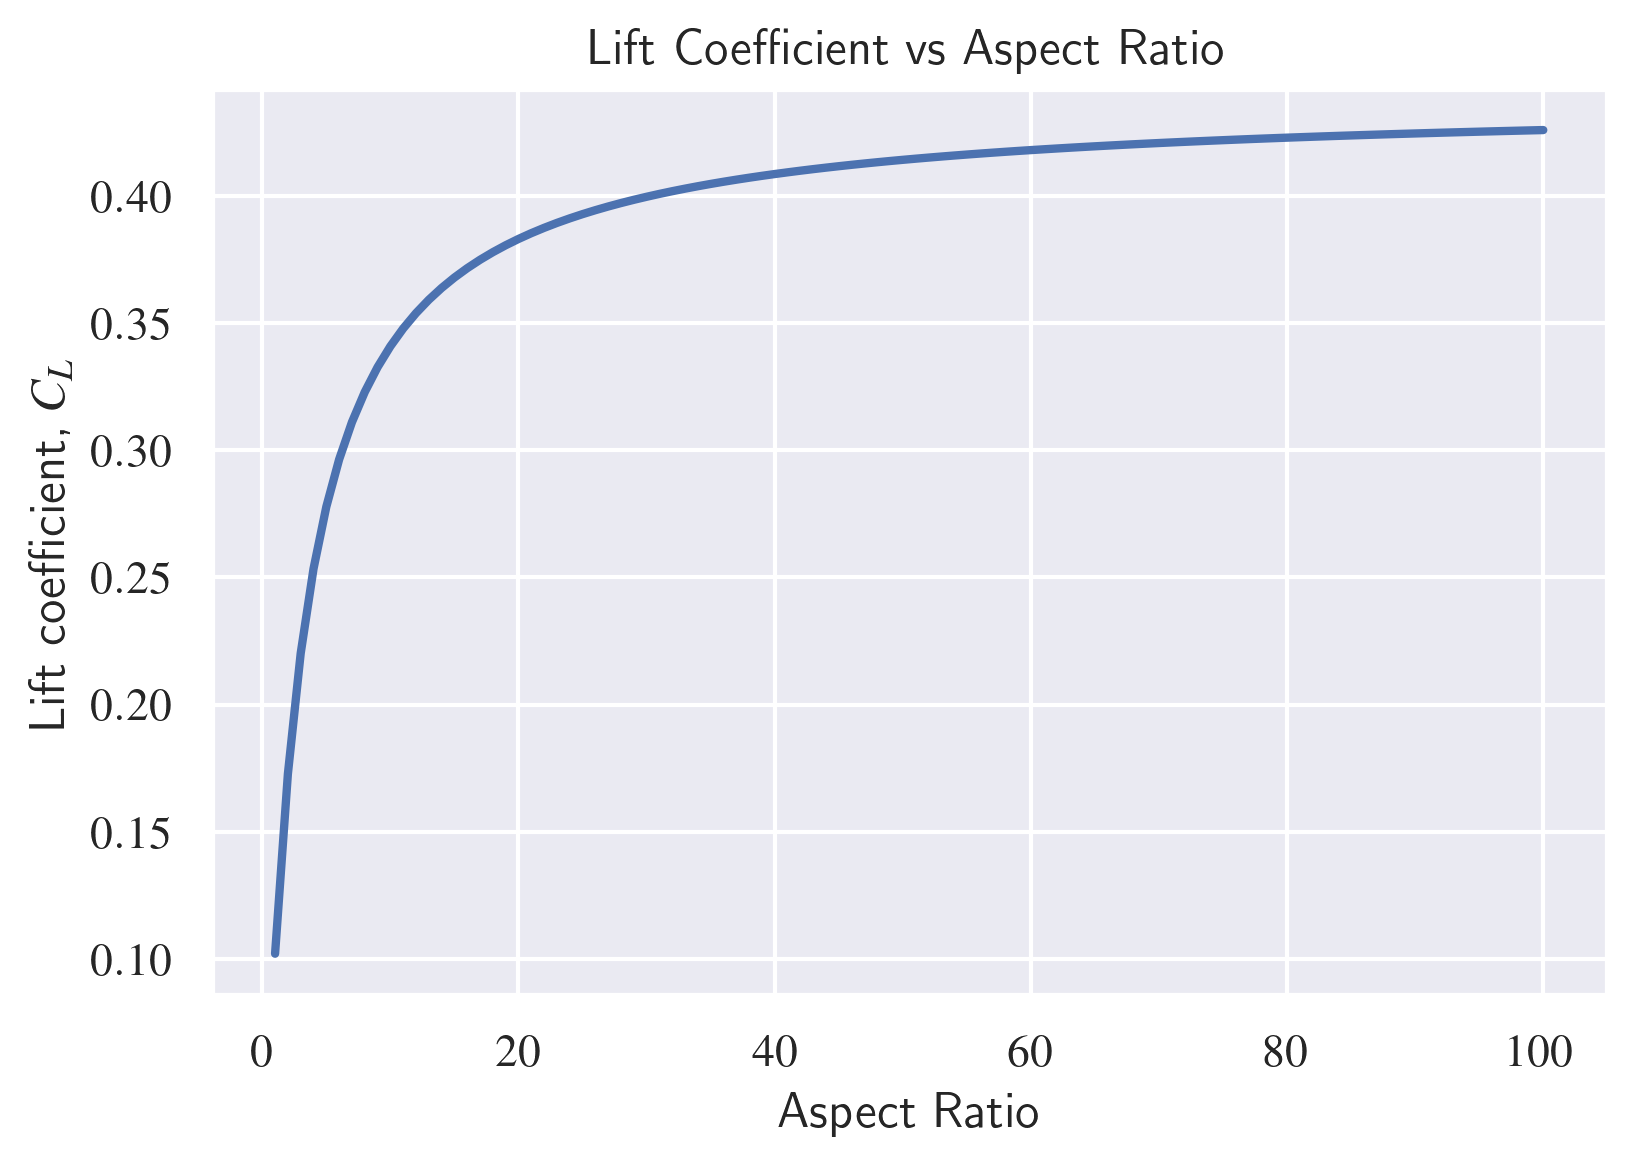

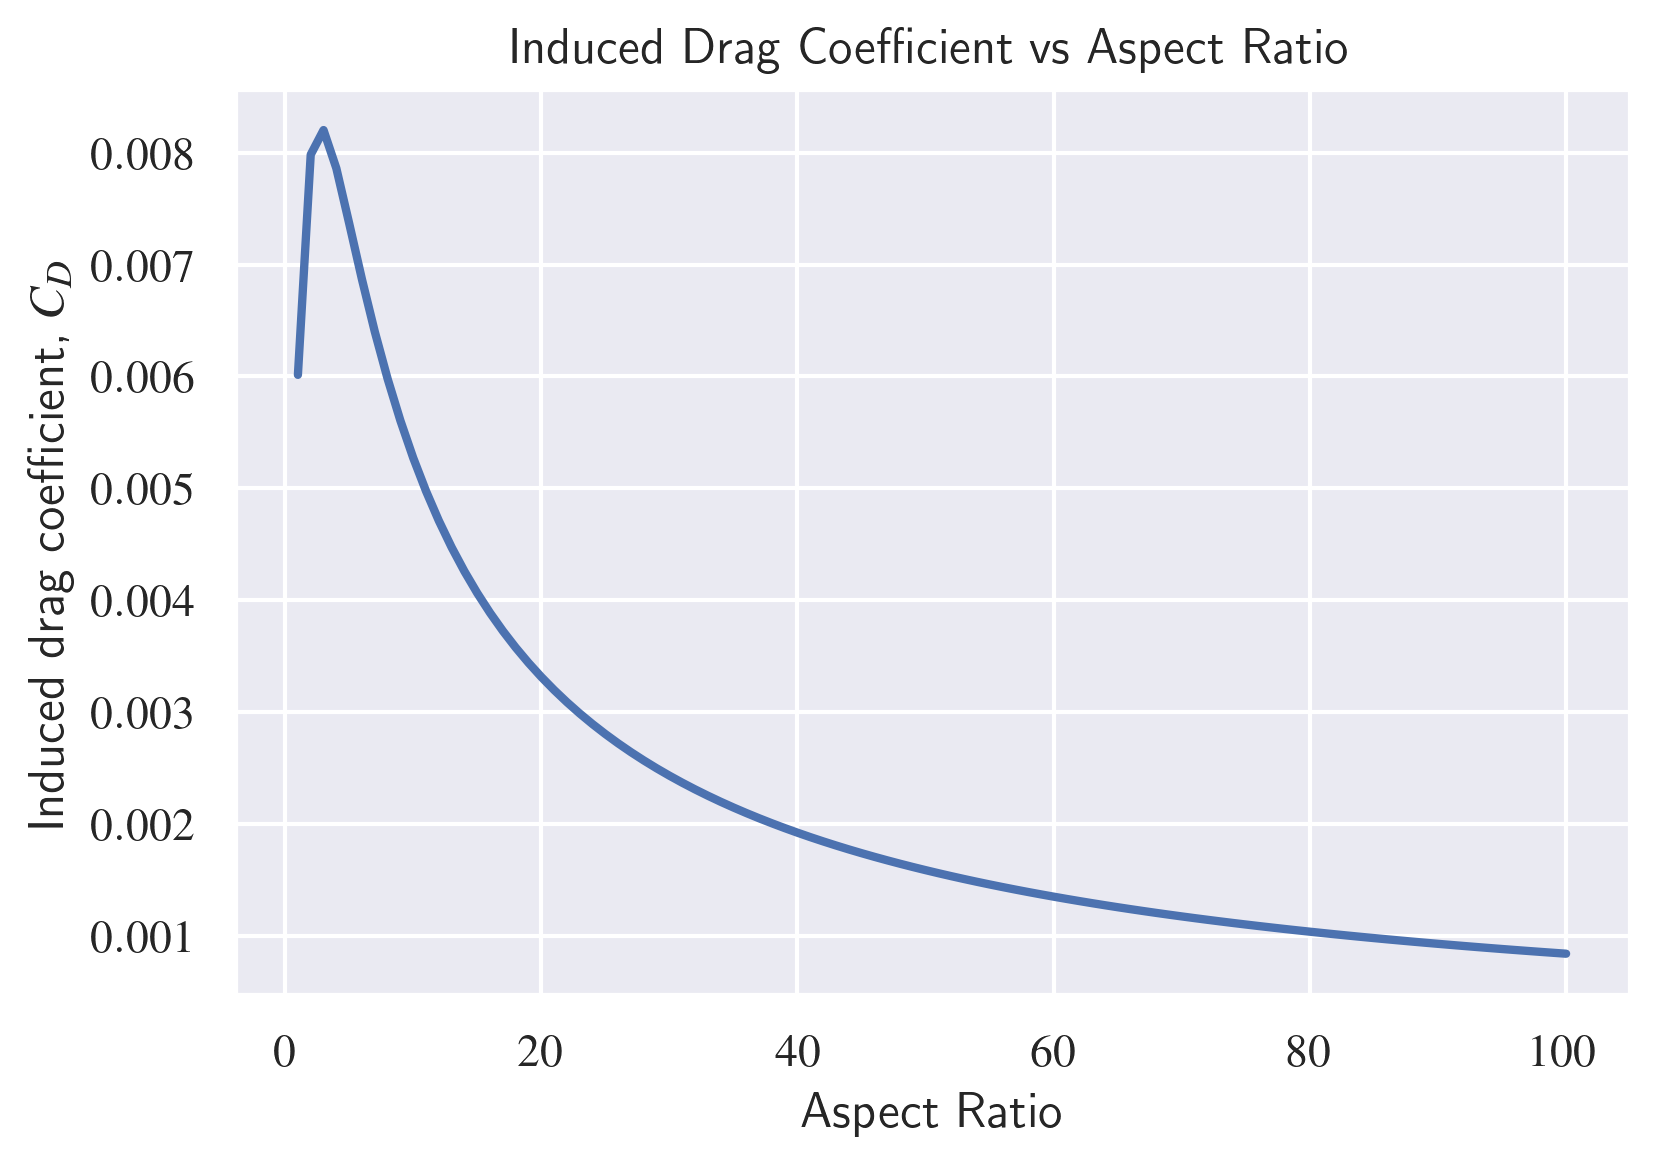

In [11]:
# Assuming AEROLOADS is a list of dictionaries with a similar structure to MATLAB's struct array
L = [aeroload['LOADS']['LSum'] for aeroload in AEROLOADS]
D = [aeroload['LOADS']['DSum'] for aeroload in AEROLOADS]
CL = [aeroload['LOADS']['CL'] for aeroload in AEROLOADS]
CD = [aeroload['LOADS']['CD'] for aeroload in AEROLOADS]
# Plotting Lift coefficient vs AoA
plt.figure(1)
plt.plot(DATA['AE'], CL, color='b', linewidth=2)
plt.xlabel('Aspect Ratio')
plt.ylabel('Lift coefficient, $C_L$')
plt.title('Lift Coefficient vs Aspect Ratio')
plt.savefig('figure/lift_for_different_AR.pdf')


# Plotting Induced Drag coefficient vs AoA
plt.figure(2)
plt.plot(DATA['AE'], CD, color='b', linewidth=2)
plt.xlabel('Aspect Ratio')
plt.ylabel('Induced drag coefficient, $C_D$')
plt.title('Induced Drag Coefficient vs Aspect Ratio')
plt.savefig('figure/drag_for_different_AR.pdf')


## Question 4


In [12]:
DATA = {
    "VInf": 10.0,         # Free-stream velocity
    "Chord": 1.0,         # Chord wing dimension
    "Rho": 1.225,         # Air density
    "NHShoe": [40],       # Number of horseshoe elements
    "AE": [10],            # Aspect ratio
    "AoA": np.arange(0, 16, 1) # Angle of attack in degrees
}

FLAG_PLOT = 1           # (1: PLOT Wing / 2: Plot Force curves)
FLAG_Analysis = 2     # Analysis flag

# Lengths
N1 = len(DATA["AoA"])
N2 = len(DATA["AE"])
N3 = len(DATA["NHShoe"])

In [13]:
# Analysis
if FLAG_Analysis == 1:
    WING = Geometry(DATA, 0, 0)
    AMatrix = AerodynamicMatrix(DATA, WING)
    RHS = RightHandSide(DATA, WING, 0)
    GAMMA = np.linalg.solve(AMatrix, RHS)
    LOADS = AerodynamicLoads(WING, DATA, GAMMA)

elif FLAG_Analysis == 2:
    AEROLOADS = [None] * N1
    for i in range(N1):
        WING = Geometry(DATA, 0, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, i)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 3:
    AEROLOADS = [None] * N2
    for i in range(N2):
        WING = Geometry(DATA, i, 0)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

elif FLAG_Analysis == 4:
    AEROLOADS = [None] * N3
    for i in range(N3):
        WING = Geometry(DATA, 0, i)
        AMatrix = AerodynamicMatrix(DATA, WING)
        RHS = RightHandSide(DATA, WING, 0)
        GAMMA = np.linalg.solve(AMatrix, RHS)
        LOADS = AerodynamicLoads(WING, DATA, GAMMA)
        AEROLOADS[i] = {"LOADS": LOADS}

# # Result prints
# PrintScreenReport(DATA)

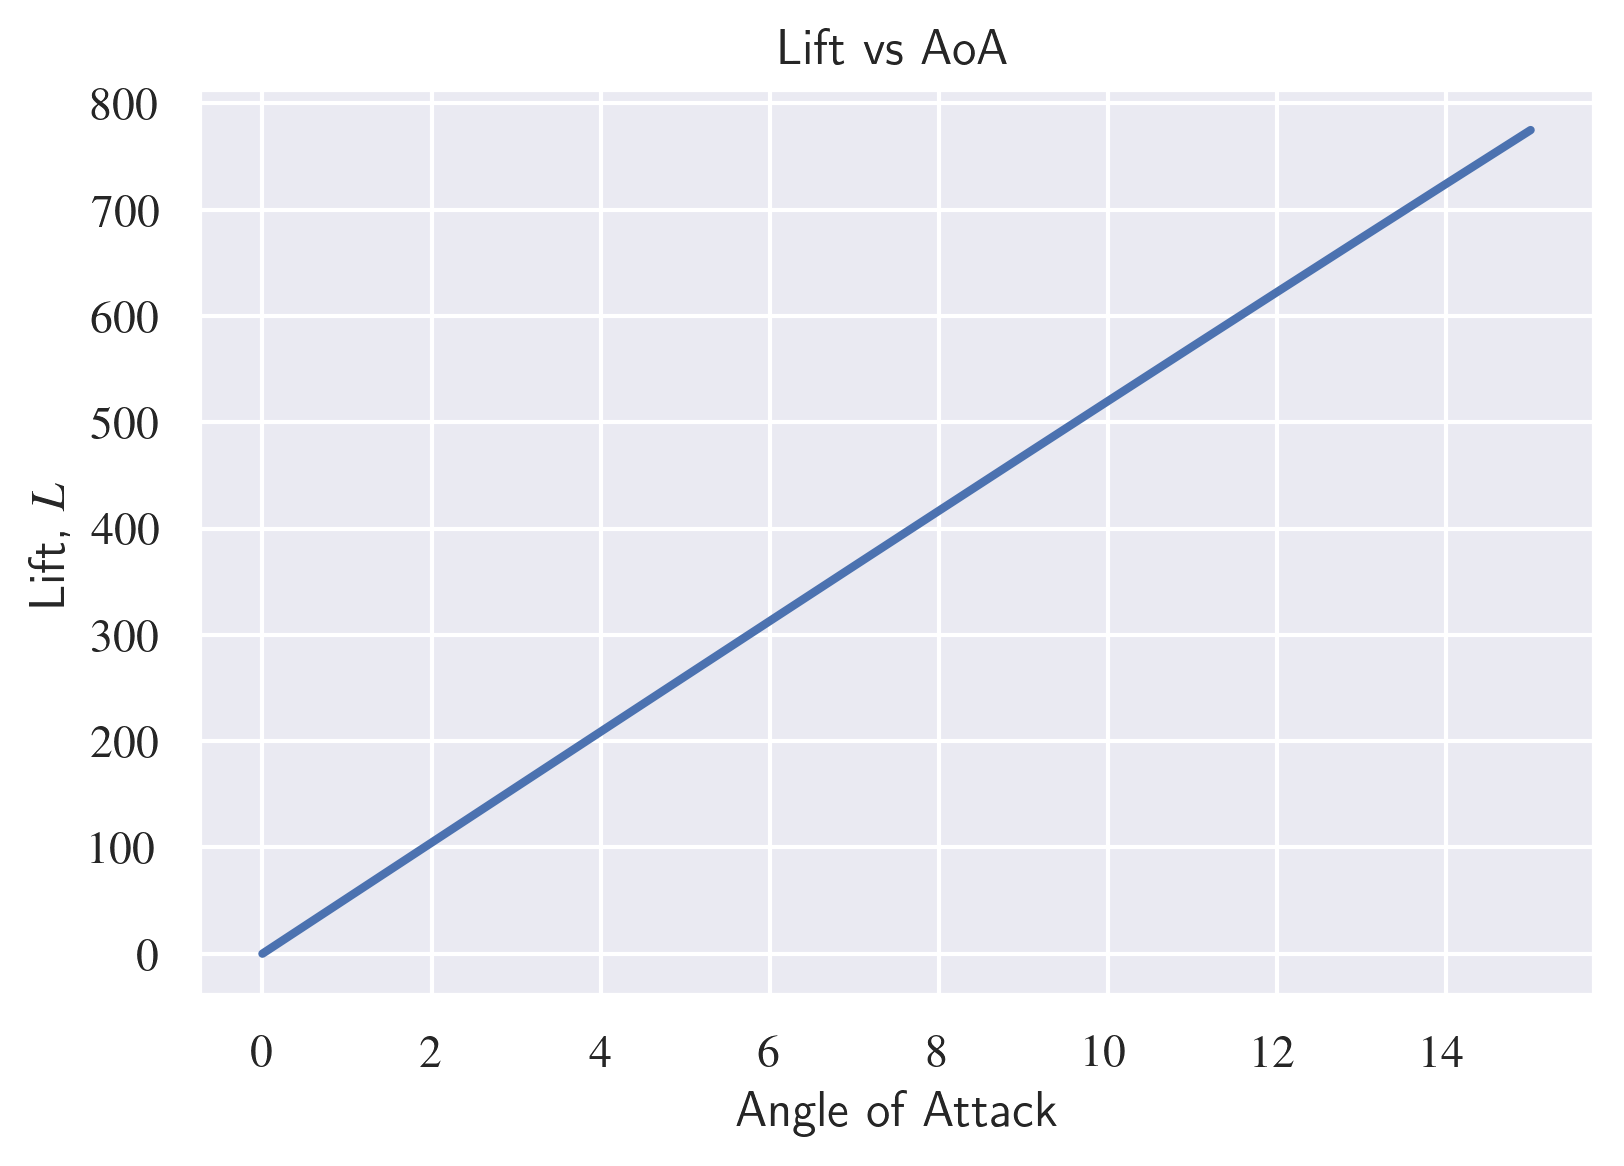

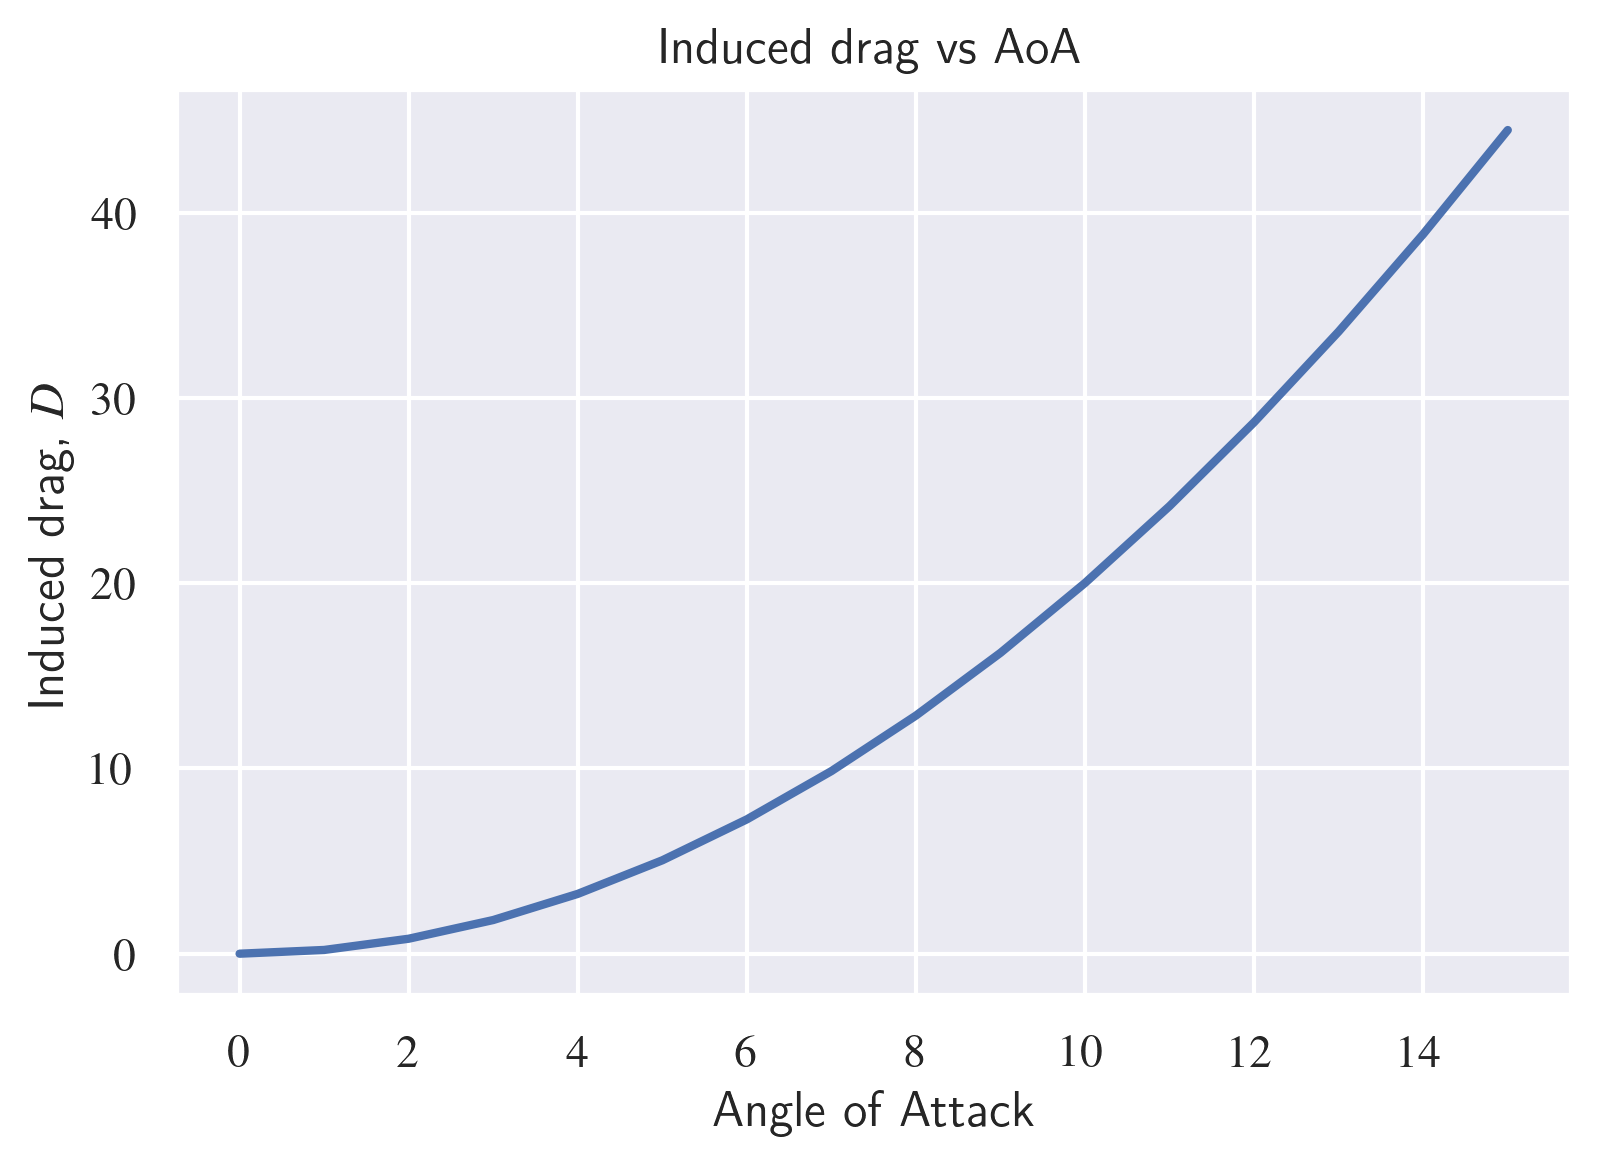

In [14]:
# Assuming AEROLOADS is a list of dictionaries with a similar structure to MATLAB's struct array
L = [aeroload['LOADS']['LSum'] for aeroload in AEROLOADS]
D = [aeroload['LOADS']['DSum'] for aeroload in AEROLOADS]
CL = [aeroload['LOADS']['CL'] for aeroload in AEROLOADS]
CD = [aeroload['LOADS']['CD'] for aeroload in AEROLOADS]
# Plotting Lift coefficient vs AoA
plt.figure(1)
plt.plot(DATA['AoA'], L, color='b', linewidth=2)
plt.xlabel('Angle of Attack')
plt.ylabel('Lift, $L$')
plt.title('Lift vs AoA')
plt.savefig('figure/lift_vs_AoA.pdf')



# Plotting Induced Drag coefficient vs AoA
plt.figure(2)
plt.plot(DATA['AoA'], D, color='b', linewidth=2)
plt.xlabel('Angle of Attack')
plt.ylabel('Induced drag, $D$')
plt.title('Induced drag vs AoA')
plt.savefig('figure/induced_drag_vs_AoA.pdf')


## Question 5

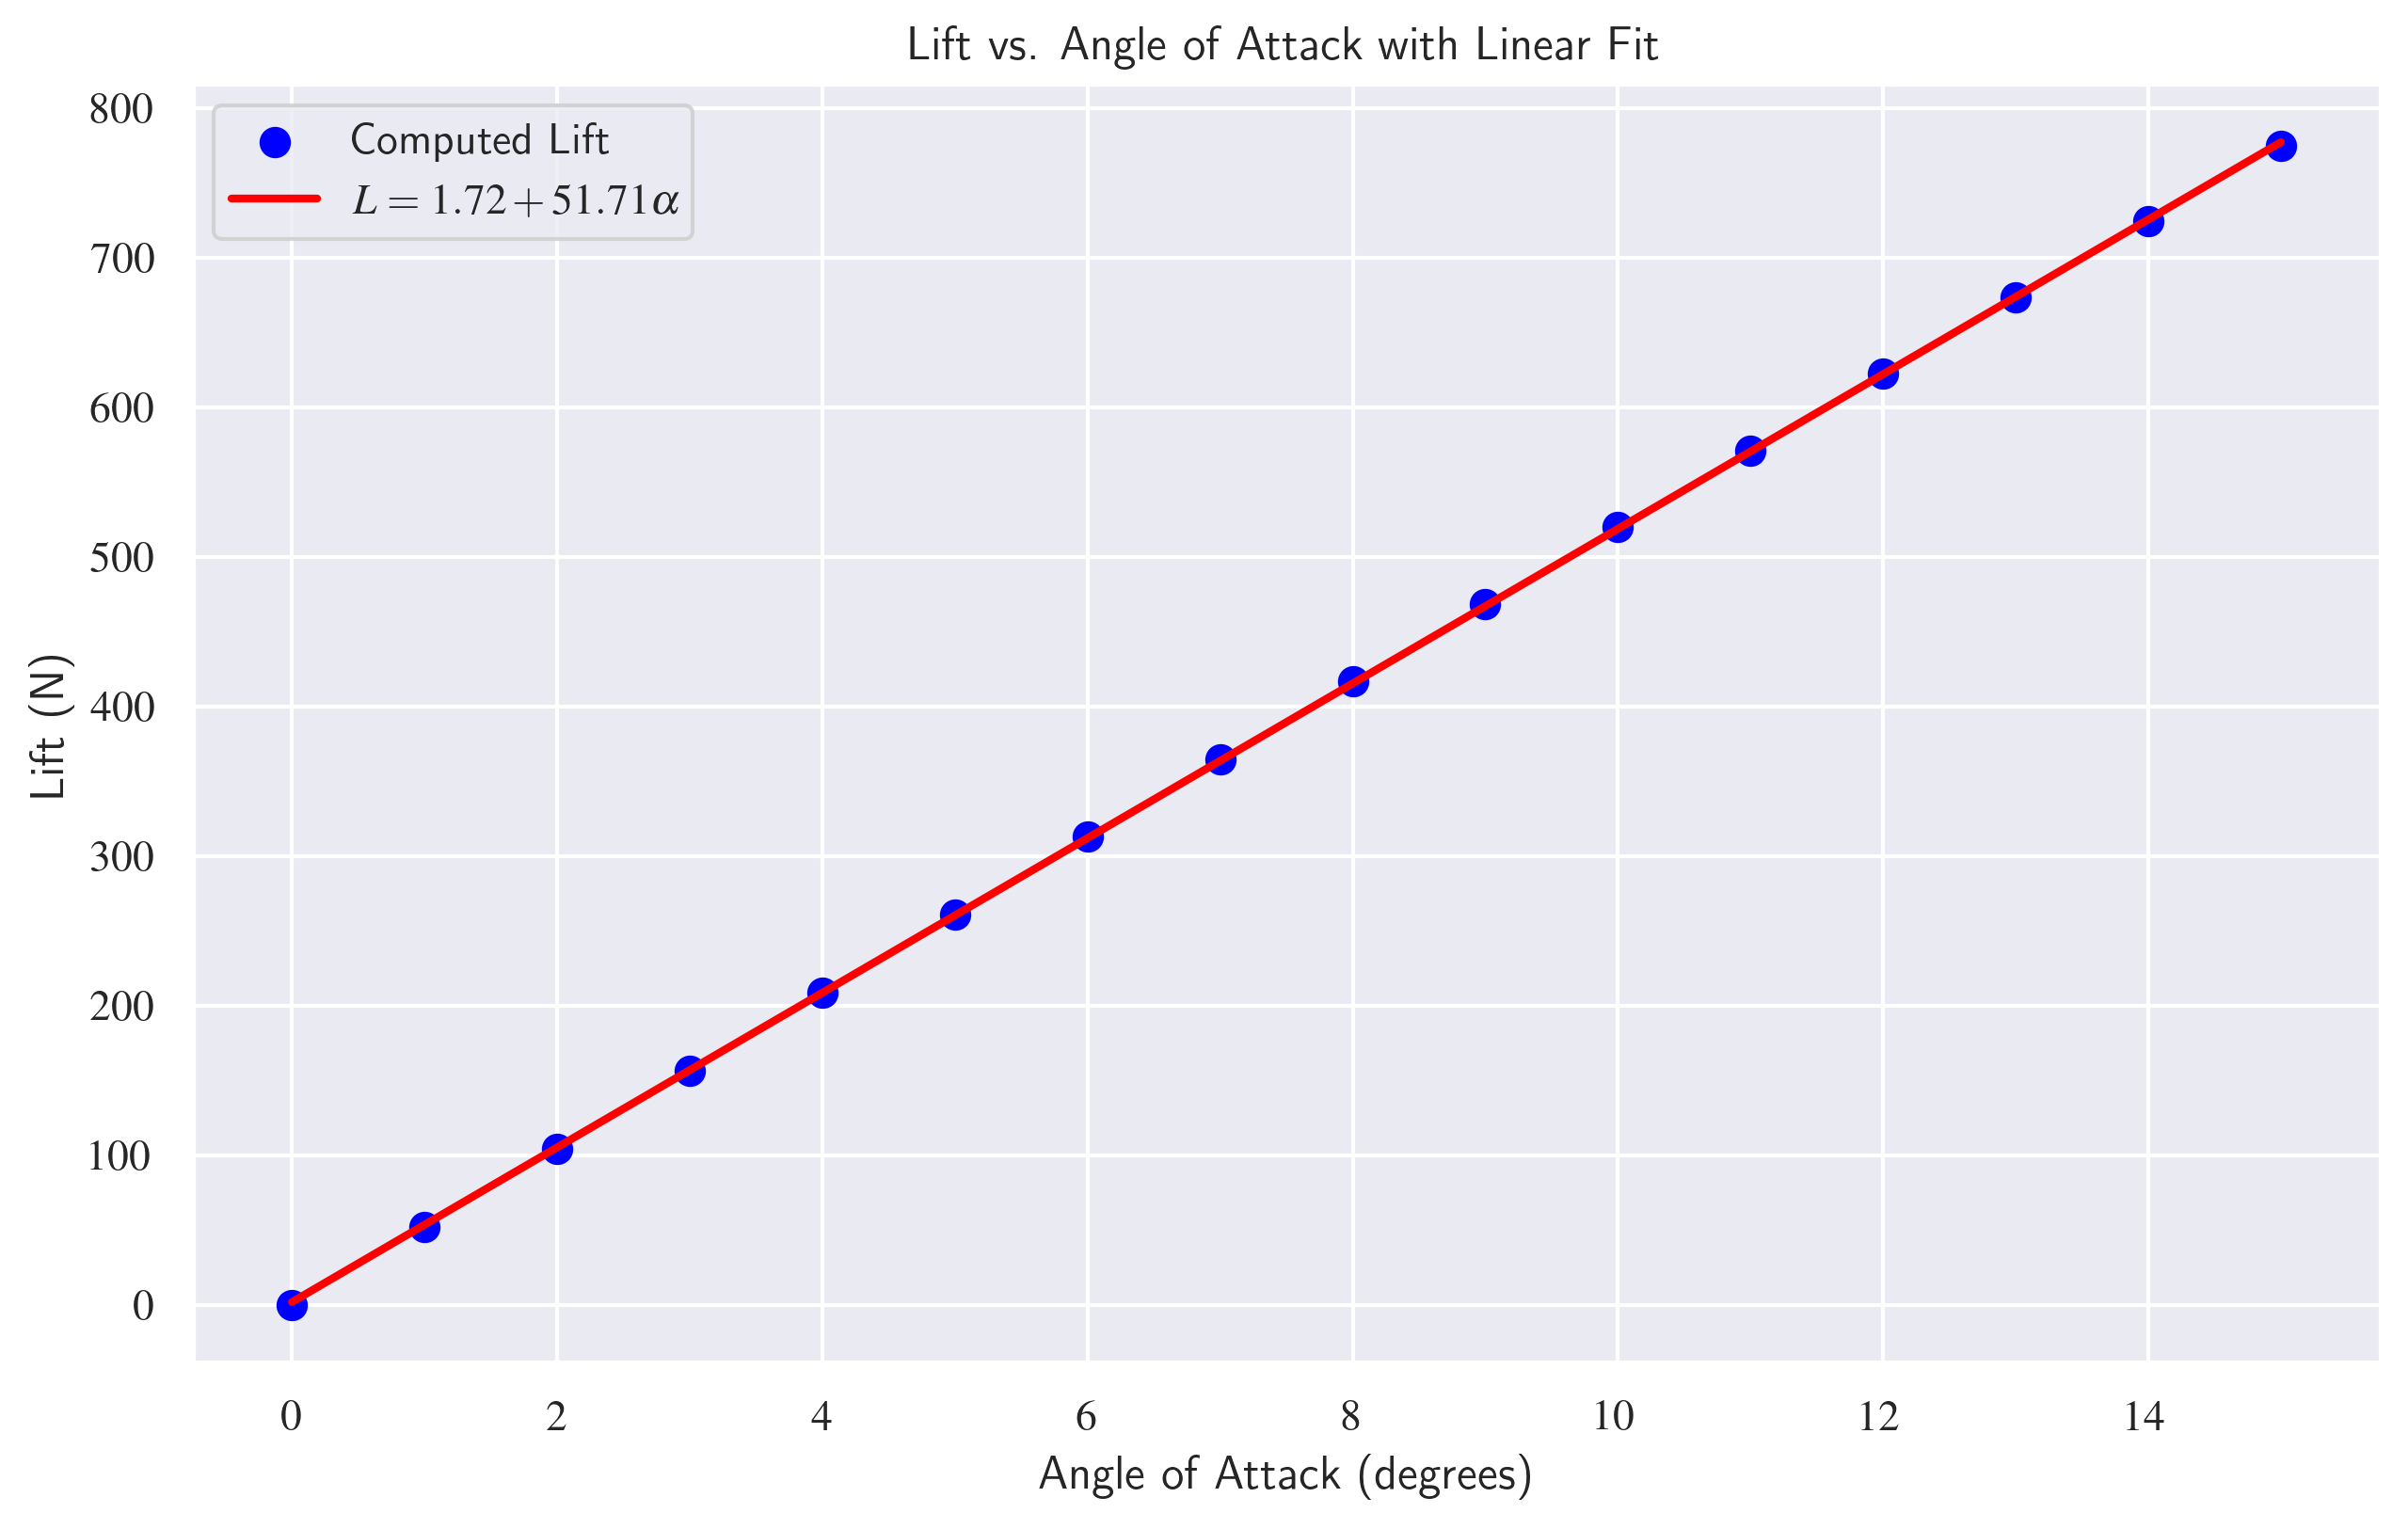

The derivative of Lift with respect to Angle of Attack is approximately 0.902 Newtons per radian.


In [16]:
from scipy.stats import linregress

slope, intercept, r, pval, stderr, = linregress(DATA['AoA'][:16], L[:16])
least_square_model = intercept + slope * DATA['AoA'][:16]

# Plot the original data and the linear fit
plt.figure(figsize=(10, 6))

# Plot the computed L vs AoA values as points
plt.scatter(DATA['AoA'], L, color='blue', linewidth=2, label='Computed Lift')

# Plot the linear fit line
plt.plot(DATA['AoA'], least_square_model, color='red', linewidth=2, label=f'$L = {intercept:.2f} + {slope:.2f}\\alpha$')

# Label the plot
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift (N)')
plt.title('Lift vs. Angle of Attack with Linear Fit')
plt.legend()

plt.savefig('figure/lift_vs_AoA_lin_reg.pdf')

# Show the plot
plt.show()

# The slope from the linear regression is the derivative dL/dα per degree

# Conversion factor from degrees to radians
degrees_to_radians = np.pi / 180

# Convert the derivative to per radian
dL_dalpha_per_radian = slope * degrees_to_radians

# Print the derivative
print(f"The derivative of Lift with respect to Angle of Attack is approximately {dL_dalpha_per_radian:.3f} Newtons per radian.")





